In [1]:
#installation de yfinance et matplotolib pour la récupération des données sur yahoo finance
!pip install yfinance
!pip install matplotlib
import yfinance as yahooFinance
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


#Importation du cours de l'action de l'entreprise d'assurance AXA

start_Date = datetime.datetime(2010, 1, 1)
end_Date = datetime.datetime(2022, 12, 9)

GetAXAInfo = yahooFinance.Ticker("AXA")

print(GetAXAInfo.history(start=start_Date,end=end_Date))

df=GetAXAInfo.history(start=start_Date,end=end_Date)

type(df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 18.7 MB/s eta 0:00:0000:0100:01
                                Open       High        Low      Close  Volume  \
Date                                                                            
2010-01-05 00:00:00-05:00  16.719999  17.020000  16.719999  17.020000     400   
2010-01-07 00:00:00-05:00  17.180000  17.180000  17.045000  17.045000     236   
2010-01-08 00:00:00-05:00  17.200001  17.200001  17.200001  17.200001     403   
2010-01-22 00:00:00-05:00  15.900000  15.980000  15.900000  15.980000     300   
2010-01-26 00:00:00-05:00  15.400000  15.400000  15.280000  15.280000     100   
...                              ...        ...        ...        ...     ...   
2018-02-28 00:00:00-05:00  25.945000  26.139999  25.945000  26.070000    3688   
2018-05-31 00:00:00-04:00  27.600000  27.680000  26.459999  26.920000  457483   
2018-06-01 00:00:00-04:00  26.920000  27.379999  26.799999  27.360001  310787   
2018-12-27 00:00:00-

pandas.core.frame.DataFrame

In [2]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [3]:
dec=df["Close"].shift(1)
dec

Date
2010-01-05 00:00:00-05:00          NaN
2010-01-07 00:00:00-05:00    17.020000
2010-01-08 00:00:00-05:00    17.045000
2010-01-22 00:00:00-05:00    17.200001
2010-01-26 00:00:00-05:00    15.980000
                               ...    
2018-02-28 00:00:00-05:00    26.000000
2018-05-31 00:00:00-04:00    26.070000
2018-06-01 00:00:00-04:00    26.920000
2018-12-27 00:00:00-05:00    27.360001
2018-12-28 00:00:00-05:00    18.250000
Name: Close, Length: 1823, dtype: float64

In [4]:
df= df.assign(close_veille=dec)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,close_veille
Date,,,,,,,,
2010-01-05 00:00:00-05:00,16.719999,17.020000,16.719999,17.020000,400,0,0,NaN
2010-01-07 00:00:00-05:00,17.180000,17.180000,17.045000,17.045000,236,0,0,17.020000
2010-01-08 00:00:00-05:00,17.200001,17.200001,17.200001,17.200001,403,0,0,17.045000
2010-01-22 00:00:00-05:00,15.900000,15.980000,15.900000,15.980000,300,0,0,17.200001
2010-01-26 00:00:00-05:00,15.400000,15.400000,15.280000,15.280000,100,0,0,15.980000
...,...,...,...,...,...,...,...,...
2018-02-28 00:00:00-05:00,25.945000,26.139999,25.945000,26.070000,3688,0,0,26.000000
2018-05-31 00:00:00-04:00,27.600000,27.680000,26.459999,26.920000,457483,0,0,26.070000
2018-06-01 00:00:00-04:00,26.920000,27.379999,26.799999,27.360001,310787,0,0,26.920000


In [22]:
#On décide d'enlever les colonnes dividends et stock split
df = df.drop(columns = ["Dividends", "Stock Splits"])
df

,Open,High,Low,Close,Volume,close_veille
Date,,,,,,
2010-01-05 00:00:00-05:00,16.719999,17.020000,16.719999,17.020000,400,NaN
2010-01-07 00:00:00-05:00,17.180000,17.180000,17.045000,17.045000,236,17.020000
2010-01-08 00:00:00-05:00,17.200001,17.200001,17.200001,17.200001,403,17.045000
2010-01-22 00:00:00-05:00,15.900000,15.980000,15.900000,15.980000,300,17.200001
2010-01-26 00:00:00-05:00,15.400000,15.400000,15.280000,15.280000,100,15.980000
...,...,...,...,...,...,...
2018-02-28 00:00:00-05:00,25.945000,26.139999,25.945000,26.070000,3688,26.000000
2018-05-31 00:00:00-04:00,27.600000,27.680000,26.459999,26.920000,457483,26.070000
2018-06-01 00:00:00-04:00,26.920000,27.379999,26.799999,27.360001,310787,26.920000


0.004999999888241291

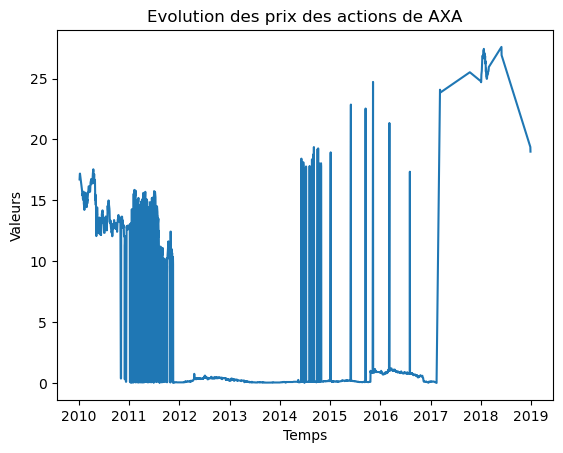

In [5]:
#On fait un tableau pour voir l'évolution des prix au cours du temps
df2 = df.copy()
new_df = df2[['Open']]
plt.plot(new_df)
plt.title("Evolution des prix des actions de AXA")
plt.ylabel("Valeurs")
plt.xlabel("Temps")
min(new_df['Open'])

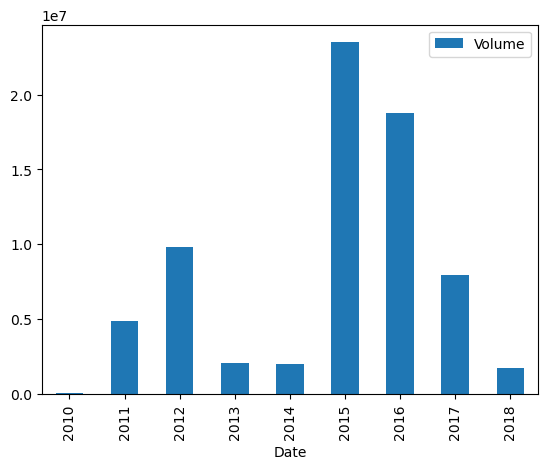

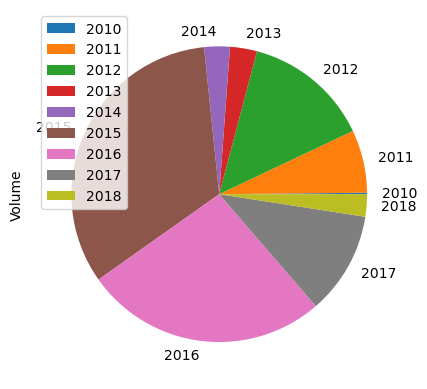

,Open,Volume
Open,1.000000,-0.103868
Volume,-0.103868,1.000000


In [60]:
#On veut aussi avoir un histogramme qui nous montre le nombre de transaction par année de l'action AXA 
new_df = df2[['Volume']]
new_df

new_df = new_df.reset_index()
new_df["Date"] = new_df["Date"].apply(lambda x: x.strftime("%Y"))

df_grouped = new_df.groupby(new_df['Date'])

#for key, item in df_grouped:
#    print(key)
#    print(df_grouped.get_group(key))

sums = df_grouped.sum()
sums
sums.plot.bar()
plt.show()

sums.plot.pie(subplots=True)
plt.show()


cor = df[["Open", "Volume"]].corr()
cor

In [ ]:
#Donc faire une analyse de ces données 

                 Open  close_veille
Date                               
2010-01-07  17.180000     17.020000
2010-01-08  17.200001     17.045000
2010-01-22  15.900000     17.200001
2010-01-26  15.400000     15.980000
2010-01-28  15.560000     15.280000
...               ...           ...
2018-02-28  25.945000     26.000000
2018-05-31  27.600000     26.070000
2018-06-01  26.920000     26.920000
2018-12-27  19.379999     27.360001
2018-12-28  19.000000     18.250000

[1822 rows x 2 columns]
[[0.95455878 0.04068387]]
Mean squared error: 0.03
Coefficient of determination: 1.00


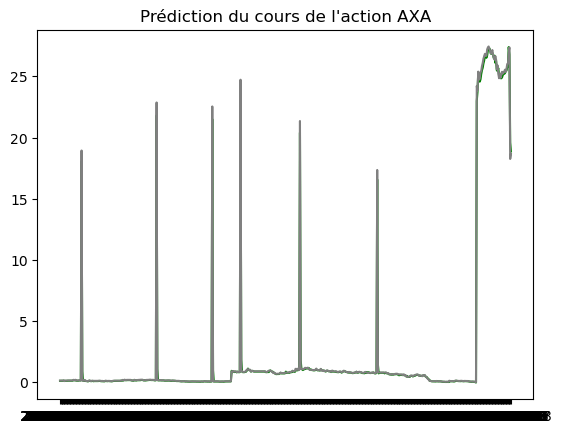

In [49]:
#Lobjectif ici est donc de faire une régression linéaire pour prédire la valeur des prix des actifs à la fin de la journée
#On utilise les prix d'ouverture et les prix de fermeture de la veille
#on utilise alors le programme d'une seule régression ic 
new_df = df.copy()
new_df = new_df.reset_index()
new_df["Date"] = new_df["Date"].dt.strftime('%Y-%m-%d')
new_df = new_df.set_index('Date')



X = new_df[['Open', 'close_veille']]
Y = new_df[['Close']]
X = X[1:len(X)]
Y = Y[1:len(Y)]
print(X)

#On définit les tests, pour cela il nous faut une valeur ou arreter les données on la note p
p = int((2/3)*len(X))
X_train = X[:p]
Y_train = Y[:p]
X_test = X[p:]
Y_test = Y[p:]

#On passe désormais à la régression linéaire 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
print(regr.coef_)

y_pred = regr.predict(X_test)
plt.plot(y_pred, color='green')
plt.plot(Y_test, color='gray')
plt.title("Prédiction du cours de l'action AXA")

from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))



           Open
1     17.180000
2     17.200001
3     15.900000
4     15.400000
5     15.560000
...         ...
1818  25.945000
1819  27.600000
1820  26.920000
1821  19.379999
1822  19.000000

[1822 rows x 1 columns]
[[0.98647407]]


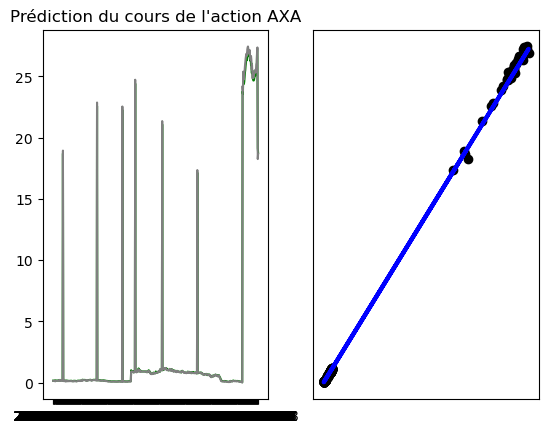

In [59]:
reg = LinearRegression()

X= new_df[['Open']]
X = X[1:(len(X))]
print(X)
p = int((2/3)*len(X))
X_train = X[:p]
X_test = X[p:]
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print(reg.coef_)

y_pred = reg.predict(X_test)
plt.subplot(121)
plt.plot(y_pred, color='green')
plt.plot(Y_test, color='gray')
plt.title("Prédiction du cours de l'action AXA")

plt.subplot(122)
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
#Conclure que cela doit être bizarre = meilleure régression avec une seule variable explicative 
#Le prix à l'ouverture explique quasiment le prix de fermeture = coefficient égal à 1

In [57]:
rdt1=df["Close"].pct_change() #on ne peut pas calculer les logrendements car on a des rendements négatifs
df=df.assign(rdt_close=rdt1)
df

,Open,High,Low,Close,Volume,close_veille,rdt_close
Date,,,,,,,
2010-01-05 00:00:00-05:00,16.719999,17.020000,16.719999,17.020000,400,NaN,NaN
2010-01-07 00:00:00-05:00,17.180000,17.180000,17.045000,17.045000,236,17.020000,0.001469
2010-01-08 00:00:00-05:00,17.200001,17.200001,17.200001,17.200001,403,17.045000,0.009094
2010-01-22 00:00:00-05:00,15.900000,15.980000,15.900000,15.980000,300,17.200001,-0.070930
2010-01-26 00:00:00-05:00,15.400000,15.400000,15.280000,15.280000,100,15.980000,-0.043805
...,...,...,...,...,...,...,...
2018-02-28 00:00:00-05:00,25.945000,26.139999,25.945000,26.070000,3688,26.000000,0.002692
2018-05-31 00:00:00-04:00,27.600000,27.680000,26.459999,26.920000,457483,26.070000,0.032605
2018-06-01 00:00:00-04:00,26.920000,27.379999,26.799999,27.360001,310787,26.920000,0.016345


In [25]:
rdt2=df["Open"].pct_change() 
df=df.assign(rdt_open=rdt2)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,close_veille,rdt_close,rdt_open
Date,,,,,,,,,,
2010-01-05 00:00:00-05:00,16.719999,17.020000,16.719999,17.020000,400,0,0,NaN,NaN,NaN
2010-01-07 00:00:00-05:00,17.180000,17.180000,17.045000,17.045000,236,0,0,17.020000,0.001469,0.027512
2010-01-08 00:00:00-05:00,17.200001,17.200001,17.200001,17.200001,403,0,0,17.045000,0.009094,0.001164
2010-01-22 00:00:00-05:00,15.900000,15.980000,15.900000,15.980000,300,0,0,17.200001,-0.070930,-0.075581
2010-01-26 00:00:00-05:00,15.400000,15.400000,15.280000,15.280000,100,0,0,15.980000,-0.043805,-0.031447
...,...,...,...,...,...,...,...,...,...,...
2018-02-28 00:00:00-05:00,25.945000,26.139999,25.945000,26.070000,3688,0,0,26.000000,0.002692,0.002705
2018-05-31 00:00:00-04:00,27.600000,27.680000,26.459999,26.920000,457483,0,0,26.070000,0.032605,0.063789
2018-06-01 00:00:00-04:00,26.920000,27.379999,26.799999,27.360001,310787,0,0,26.920000,0.016345,-0.024638


In [26]:
stat_rdt= df[["rdt_open", "rdt_close"]].describe()
print(stat_rdt)

          rdt_open    rdt_close
count  1822.000000  1822.000000
mean      9.045148     7.015640
std     119.892047    67.952312
min      -0.997726    -0.997407
25%      -0.016482    -0.012382
50%       0.000000     0.000000
75%       0.012993     0.008375
max    4815.999925  2419.500046


In [27]:
cor = df[["Close","Open", "rdt_close","rdt_open"]].corr() #correlation entre les trois
cor 

,Close,Open,rdt_close,rdt_open
Close,1.000000,0.994262,0.196836,0.143557
Open,0.994262,1.000000,0.195497,0.155352
rdt_close,0.196836,0.195497,1.000000,0.956538
rdt_open,0.143557,0.155352,0.956538,1.000000


/tmp/ipykernel_329/2868392304.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Close"], shade=True)


<AxesSubplot: xlabel='Close', ylabel='Density'>

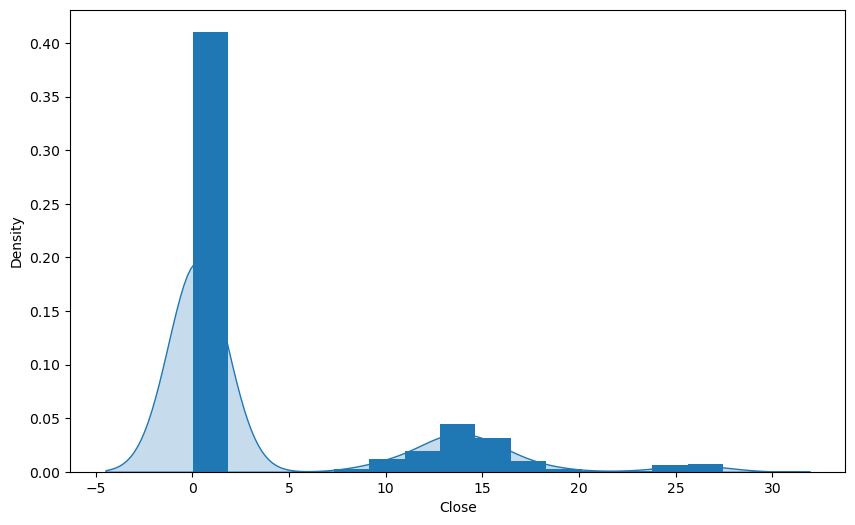

In [28]:
plt.figure(figsize=(10,6))
plt.hist(df["Close"], bins=15, density=True)
sns.kdeplot(df["Close"], shade=True)

/tmp/ipykernel_329/762898542.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["rdt_close"], shade=True)


<AxesSubplot: xlabel='rdt_close', ylabel='Density'>

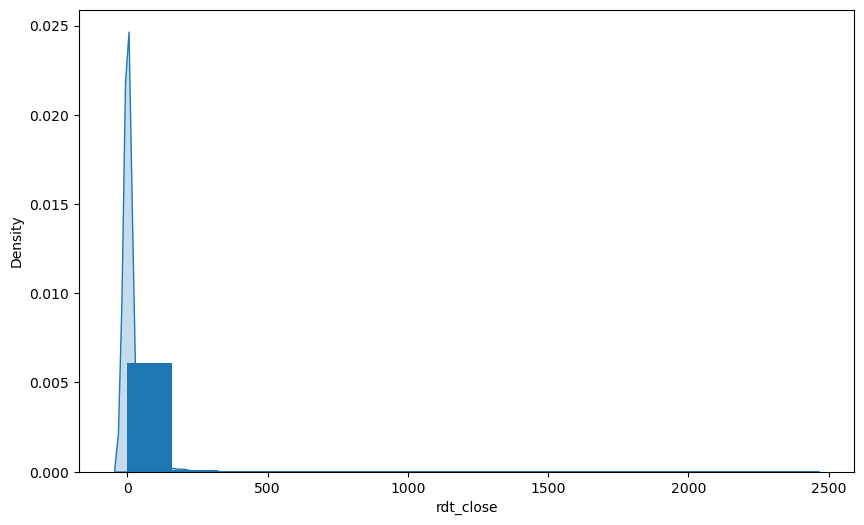

In [29]:
plt.figure(figsize=(10,6))
plt.hist(df["rdt_close"], bins=15, density=True)
sns.kdeplot(df["rdt_close"], shade=True)

In [39]:
from scipy import stats

In [40]:
stat, p_close = stats.shapiro(df.Close) # test de Shapiro-Wilk pour vérifier la normalité des rendements
print("P-valeur_close: {:.4f}".format(p_close)) # affiche la p-valeur avec 4 chiffres significatifs après la virgule
#L'hypothèse de normalité n'est pas vérifiée au seuil de signification 0.05

P-valeur_close: 0.0000


/tmp/ipykernel_329/1955928820.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Open"], shade=True)


<AxesSubplot: xlabel='Open', ylabel='Density'>

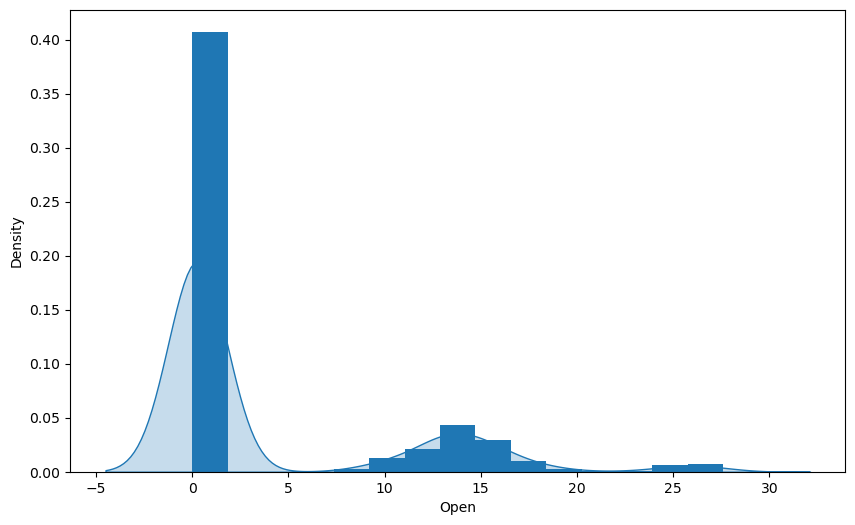

In [41]:
plt.figure(figsize=(10,6))
plt.hist(df["Open"], bins=15, density=True)
sns.kdeplot(df["Open"], shade=True)

/tmp/ipykernel_329/4136137791.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["rdt_open"], shade=True)


<AxesSubplot: xlabel='rdt_open', ylabel='Density'>

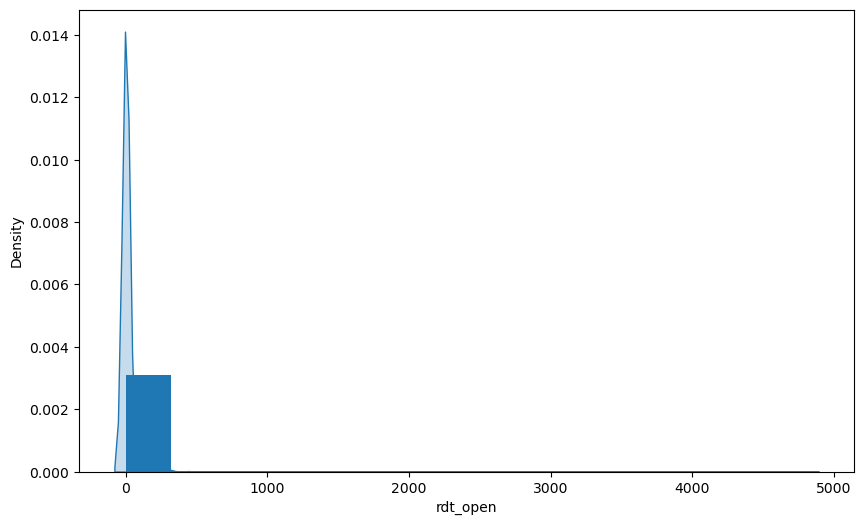

In [42]:
plt.figure(figsize=(10,6))
plt.hist(df["rdt_open"], bins=15, density=True)
sns.kdeplot(df["rdt_open"], shade=True)

In [43]:
stat, p_open = stats.shapiro(df.Open) # test de Shapiro-Wilk pour vérifier la normalité des rendements
print("P-valeur_open: {:.4f}".format(p_open)) # affiche la p-valeur avec 4 chiffres significatifs après la virgule
#L'hypothèse de normalité n'est pas vérifiée au seuil de signification 0.05

P-valeur_open: 0.0000


In [44]:
import scipy.stats as stats

stat, p1 = stats.shapiro(df.rdt_close) # test de Shapiro-Wilk pour vérifier la normalité des rendements
print("P-valeur_rdt_close: {:.4f}".format(p1)) # affiche la p-valeur avec 4 chiffres significatifs après la virgule
#L'hypothèse de normalité des rendemnts est vérifiée au seuil de signification 0.05

P-valeur_rdt_close: 1.0000


In [45]:
stat, p2 = stats.shapiro(df.rdt_open) # test de Shapiro-Wilk pour vérifier la normalité des rendements
print("P-valeur_rdt_open: {:.4f}".format(p2)) # affiche la p-valeur avec 4 chiffres significatifs après la virgule
#L'hypothèse de normalité des rendemnts est vérifiée au seuil de signification 0.05

P-valeur_rdt_open: 1.0000
